In [1]:
!pip -q install numdifftools

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed,widgets,interactive
from scipy.optimize import bisect,newton,ridder
from scipy.integrate import quad, solve_bvp

# 2. Particle in a box

In [3]:
def Pth(n_max:int,t:float,x:np.ndarray) -> np.ndarray:
  num = 0
  den = 0

  for i in range(1,n_max+1):
    num += np.exp(-i**2/t)*(np.sin(i*x))**2
    den += np.exp(-i**2/t)

  return (2/np.pi)*(num/den)

In [4]:
def nmax(func,t,tol=1e-12,args=None):
  if args:
    if np.isscalar(t):  # If t is a single value
      i = 1
      s0 = func(i,t,*args)
      s1 = func(i+1,t,*args)
      delta = np.abs(s0-s1)

      while np.max(delta) > tol:
        i += 1
        s0 = func(i,t,*args)
        s1 = func(i+1,t,*args)
        delta = np.abs(s0-s1)
      return i
    else:  # If t is an array
      return np.array([nmax(func, ti, tol, args) for ti in t])

In [5]:
for i in range(1,1):
  print(i)

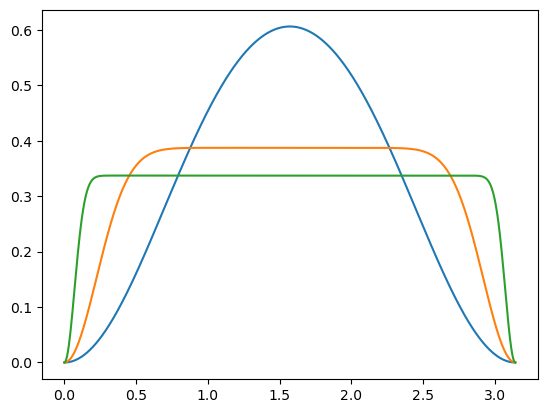

In [6]:
t = np.array([1,10,100])
xs = np.linspace(0,np.pi,1000)
n_max = nmax(Pth,t,args=(xs,))

for i,j in zip(t,n_max):
  plt.plot(xs,Pth(j,i,xs))

In [7]:
def graf1(t):
  xs = np.linspace(0,np.pi,1000)
  n_max = nmax(Pth,t,args=(xs,))
  plt.plot(xs,Pth(n_max,t,xs))
  plt.show()

slider_t = widgets.FloatLogSlider(value=10, base=10, min=-2, max=3,
                                  step=0.01, description='mass')
# Crea la función interactiva

interactive_plot1 = interactive(graf1, t=slider_t,
                                continuous_update=0)

# Muestra la función interactiva
interactive_plot1

interactive(children=(FloatLogSlider(value=10.0, description='mass', max=3.0, min=-2.0, step=0.01), Output()),…

In [8]:
def bound(t):
  xs = np.linspace(0,np.pi,100)
  n_max = nmax(Pth,t,args=(xs,))
  func = lambda x,t,n_max: Pth(n_max,t,x) - 0.1
  d = bisect(func,0,1,args=(t,n_max))
  return d

bound = np.vectorize(bound)

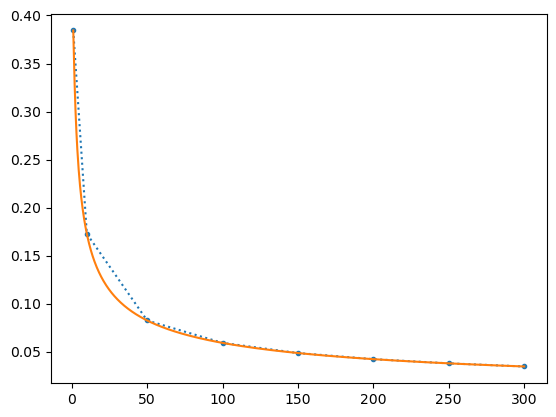

In [9]:
ts1 = [1,10,50,100,150,200,250,300]
ts2 = np.linspace(1,300,1000)
plt.plot(ts1,bound(ts1),'.:')
plt.plot(ts2,bound(ts2))#

# 3. Two spinless particles

In [10]:
def P12(x1,x2,n1,n2,particle):
  A = np.sin(n1*x1)*np.sin(n2*x2)
  B = np.sin(n1*x2)*np.sin(n2*x1)

  if particle == 'boson':
    return (2/np.pi**2)*(A+B)**2

  elif particle == 'fermion':
    if n1 == n2:
      #raise ValueError("n1 and n2 must be different to respect Pauli's exclusion principle")
      pass
    else:
      return (2/np.pi**2)*(A-B)**2

P12 = np.vectorize(P12)

In [11]:

x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

In [12]:
from mpl_toolkits.mplot3d import axes3d

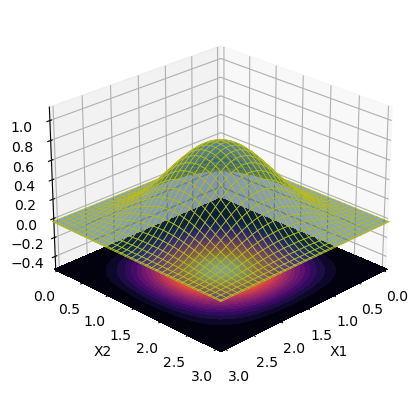

In [13]:
#@title $n_1=n_2=1$ Bosons -- P -- Figure 2 (a)

Z = P12(X1,X2,1,1,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


#surf = ax.plot_surface(X1, X2, Z, cmap='summer',linewidth=0, antialiased=False)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=25, azim=45);

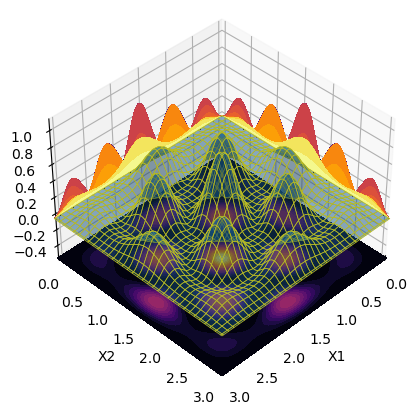

In [14]:
#@title $n_1=1, n_2=5$ Bosons -- P -- Figure 2 (b)

Z = P12(X1,X2,1,5,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.5)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=40, azim=45);

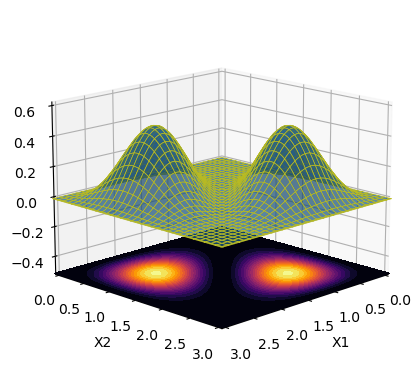

In [15]:
#@title $n_1=1, n_2=2$ Fermions -- P -- Figure 3 (a)

Z = P12(X1,X2,1,2,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.6),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=15, azim=45);

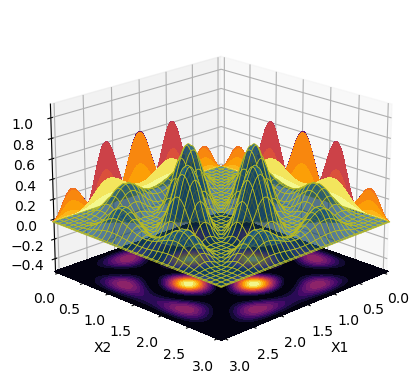

In [16]:
#@title $n_1=1, n_2=5$ Fermions -- P -- Figure 3 (b)

Z = P12(X1,X2,1,5,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface
ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 1.1),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=20, azim=45);

In [17]:
#@title Two spinless particles -- thermalized probability

def Pth2(n_max,t,x1,x2,particle):
  E = lambda n1,n2: n1**2+n2**2
  num = 0
  den = 0

  if particle == 'fermion':
    for n1 in range(1,n_max):
      for n2 in range(n1+1,n_max+1):
        num += P12(x1,x2,n1,n2,particle)*np.exp(-E(n1,n2)/t)
        den += np.exp(-E(n1,n2)/t)
    return num/den

  if particle == 'boson':
    for n1 in range(1,n_max+1):
      for n2 in range(n1,n_max+1):
        num += P12(x1,x2,n1,n2,particle)*np.exp(-E(n1,n2)/t)
        den += np.exp(-E(n1,n2)/t)
    return num/den


In [18]:
nmax(Pth2,10,args=(xs,xs,'boson'))

16

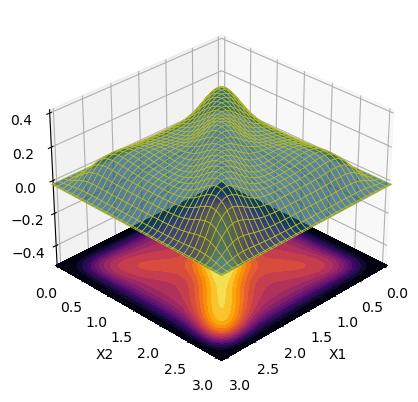

In [19]:
#@title $t=10$ Bosons -- Pht -- Figure 4 (a)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2(10,10,X1,X2,'boson')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

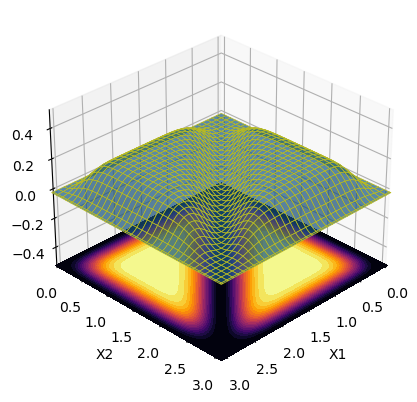

In [20]:
#@title $t=10$ Fermions -- Pht -- Figure 4 (b)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2(10,10,X1,X2,'fermion')

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=3, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.5),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

# 4. Fermions with spin

In [21]:
def P12_spin(n1:int,n2:int,x1:np.ndarray,x2:np.ndarray) -> np.ndarray:

    A = np.sin(n1*x1)*np.sin(n2*x2)
    B = np.sin(n1*x2)*np.sin(n2*x1)

    if n1 == n2:
      #raise ValueError("n1 and n2 must be different to respect Pauli's exclusion principle")
      pass
    else:

      return (1/(2*np.pi**2)) * (A+B)**2 + (3/(2*np.pi**2)) * (A-B)**2

P12_1_2 = np.vectorize(P12)

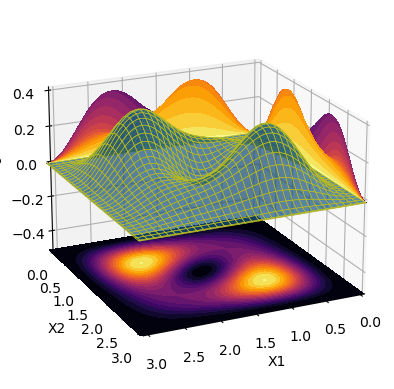

In [22]:
#@title $n_1=1,n_2=2$ Fermions -- P -- Figure 5 (a)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = P12_spin(1,2,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=20, azim=65);

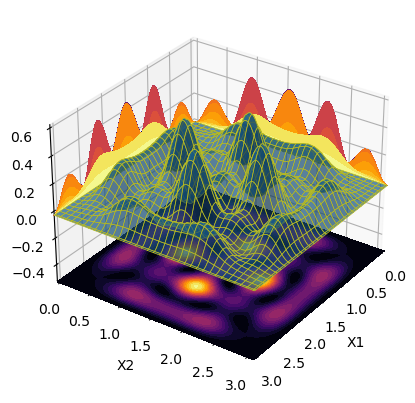

In [23]:
#@title $n_1=1,n_2=5$ Fermions -- P -- Figure 5 (b)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = P12_spin(1,5,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='inferno', levels = 20)
ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='inferno', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.6),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=35);

In [24]:
def Pth2_spin(n_max,t,x1,x2):
    E = lambda n1,n2: n1**2+n2**2
    num = 0
    den = 0

    for n1 in range(1,n_max):
        for n2 in range(n1+1,n_max+1):
            num += P12_spin(n1,n2,x1,x2)*np.exp(-E(n1,n2)/t)
            den += np.exp(-E(n1,n2)/t)

    return num/den

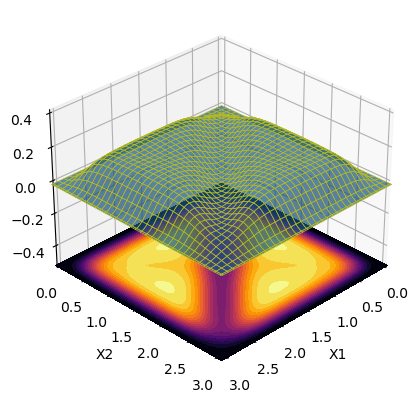

In [25]:
#@title $t=10$ Fermions -- Pht -- Figure 4 (c)
x1 = np.linspace(0,np.pi,500)
x2 = np.linspace(0,np.pi,500)
X1,X2 = np.meshgrid(x1,x2)

Z = Pth2_spin(10,10,X1,X2)

ax = plt.figure().add_subplot(projection='3d')

# Plot the 3D surface

ax.plot_surface(X1, X2, Z, edgecolor='tab:olive', lw=0.5, rstride=15, cstride=15,alpha=0.7)


ax.contourf(X1, X2, Z, zdir='z', offset=-0.5, cmap='inferno', levels = 20)
#ax.contourf(X1, X2, Z, zdir='x', offset=0, cmap='coolwarm', levels = 20)
#ax.contourf(X1, X2, Z, zdir='y', offset=0, cmap='coolwarm', levels = 20)


ax.set(xlim=(0, 3),ylim=(0, 3),zlim=(-0.5, 0.4),xlabel='X1', ylabel='X2', zlabel='P');

ax.view_init(elev=30, azim=45);

In [26]:
# verificar normalización (para borrar después)

Pth_func = lambda x, t, n_max: Pth(n_max,t,x)
quad(Pth_func,0,np.pi,args=(10,25))

(1.0000000000000002, 1.2917735069119558e-14)

# **Finite potential well**

$$
V(x)=\begin{cases}-V_0\quad\text{if }-\frac{\ell}{2}\leq x\leq \frac{\ell}{2}\\ 0\quad\text{otherwise}\end{cases}
$$

Schrödinger equation:

$$
-\dfrac{\hbar^2}{2m}\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}+V(x)\psi=E\psi
$$

Boundary conditions:

$$
\begin{align*}
\dfrac{\mathrm{d}\ln\psi_I}{\mathrm{d}x}=\dfrac{\mathrm{d}\ln\psi_{II}}{\mathrm{d}x}\\
\dfrac{\mathrm{d}\ln\psi_{II}}{\mathrm{d}x}=\dfrac{\mathrm{d}\ln\psi_{III}}{\mathrm{d}x}
\end{align*}
$$

Where $I,II,III$ represent the regions where $x<-\ell/2,-\ell/2<x<\ell/2,x>\ell/2$, respectively.

* $E<0$

  The potential $V(x)$ is an even potential, hence the eigenfunctions must have defined parity:

$$
\psi_{even}=\begin{cases}Be^{\kappa x}\quad\text{if }x<-\frac{\ell}{2}\\
C\cos(kx)\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
Be^{-\kappa x}\quad\text{if }x>\frac{\ell}{2}\end{cases}
$$
  and:
$$
\psi_{odd}=\begin{cases}Be^{\kappa x}\quad\text{if }x<-\frac{\ell}{2}\\
C\sin(kx)\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
-Be^{-\kappa x}\quad\text{if }x>\frac{\ell}{2}\end{cases}
$$

  Here, we have defined

  $$
\kappa = \sqrt{\dfrac{2m|E|}{\hbar^2}}, k=\sqrt{\dfrac{2m(V_0-|E|)}{\hbar^2}}
$$

  Imposing the continuity condition (boundary conditions), we find that the eigenvalues of the hamiltonian are given by the solutions to the trascendental equations:

  $$
  \begin{align}
  \tan z=\dfrac{\sqrt{\xi^2-z^2}}{z}\\
  \cot z=-\dfrac{\sqrt{\xi^2-z^2}}{z}
  \end{align}
  $$

  for the even and odd states, respectively, where $z=k\ell/2$ and $\sqrt{\xi^2-z^2}=\kappa\ell/2$.

  Defining the adimensional variable $y=2x/\ell$, all functions are defined in terms of $z$ and $\xi$.

In [2]:
l = 2
xi = 6

In [3]:
def coefs_even(z:float,xi:float,l:float):
  psi1 = lambda x: (np.exp(2/l*(xi**2-z**2)**0.5*x))**2
  psi2 = lambda x: np.cos(2/l*z*x)**2
  psi3 = lambda x: (np.exp(-2/l*(xi**2-z**2)**0.5*x))**2

  C2 = ((np.cos(z)*np.exp((xi**2-z**2)**0.5))**2*(quad(psi1,-np.inf,-l/2)[0]+quad(psi3,l/2,np.inf)[0])+quad(psi2,-l/2,l/2)[0])**(-1)
  C = C2**0.5
  B = np.cos(z)*np.exp((xi**2-z**2)**0.5)*C
  return B,C

def psi_even(y:np.ndarray,z:float,xi:float,l:float,B:float,C:float):
  psi1 = lambda x: np.exp(2/l*(xi**2-z**2)**0.5*x)
  psi2 = lambda x: np.cos(2/l*z*x)
  psi3 = lambda x: np.exp(-2/l*(xi**2-z**2)**0.5*x)
  #B, C = coefs

  if y < -l/2:
    return B*psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C*psi2(y)
  else:
    return B*psi3(y)

psi_even = np.vectorize(psi_even)

In [4]:
def coefs_odd(z:float,xi:float,l:float):
  psi1 = lambda x: (np.exp(2/l*(xi**2-z**2)**0.5*x))**2
  psi2 = lambda x: np.sin(2/l*z*x)**2
  psi3 = lambda x: (-np.exp(-2/l*(xi**2-z**2)**0.5*x))**2

  C2 = ((-np.sin(z)*np.exp((xi**2-z**2)**0.5))**2*(quad(psi1,-np.inf,-l/2)[0]+quad(psi3,l/2,np.inf)[0])+quad(psi2,-l/2,l/2)[0])**(-1)
  C = C2**0.5
  B = -np.sin(z)*np.exp((xi**2-z**2)**0.5)*C
  return B,C

def psi_odd(y:np.ndarray,z:float,xi:float,l,B:float,C:float):
  psi1 = lambda x: np.exp(2/l*(xi**2-z**2)**0.5*x)
  psi2 = lambda x: np.sin(2/l*z*x)
  psi3 = lambda x: -np.exp(-2/l*(xi**2-z**2)**0.5*x)
  #B, C = coefs

  if y < -l/2:
    return B*psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C*psi2(y)
  else:
    return B*psi3(y)

psi_odd = np.vectorize(psi_odd)

In [5]:
B,C=coefs_even(3.99,xi,l)

In [6]:
B,C

(-52.83296953616821, 0.9046620737228559)

In [7]:
psi_even(0,3.99,xi,l,B,C)
P_even = lambda y,z,xi,l,B,C: psi_even(y,z,xi,l,B,C)**2
quad(P_even,-np.inf,np.inf,args=(3.99,6,l,B,C))

(0.9999999999993351, 2.3344502314831765e-09)

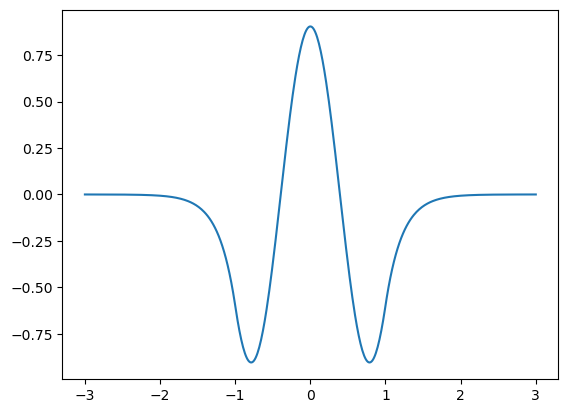

In [8]:
xs = np.linspace(-3,3,500)
plt.plot(xs,psi_even(xs,3.99,xi,l,B,C))

In [9]:
D,E = coefs_odd(5.23,xi,l)

In [10]:
P_odd = lambda y,z,xi,l,B,C: psi_odd(y,z,xi,l,B,C)**2
quad(P_odd,-np.inf,np.inf,args=(5.23,xi,l,D,E))

(1.0000000000001323, 1.1955872662414775e-08)

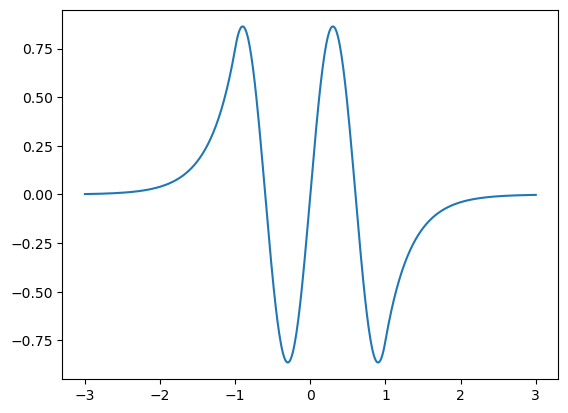

In [11]:
ys = np.linspace(-3,3,500)
plt.plot(ys,psi_odd(ys,5.23,xi,l,D,E))

In [12]:
def energies_even(xi):
  func = lambda z: np.tan(z)-(xi**2-z**2)**0.5/z
  n = int(np.ceil(xi/np.pi))
  Es = np.zeros(n)
  for i in range(n):
    Es[i] = newton(func,np.pi/4+i*np.pi)
  return Es

def energies_odd(xi):
  func = lambda z: 1/np.tan(z)+(xi**2-z**2)**0.5/z
  n = int(np.ceil(xi/np.pi-1/2))
  Es = np.zeros(n)
  for i in range(n):
    Es[i] = newton(func,np.pi/4+i*np.pi)
  return Es

In [13]:
def well(y:float,xi:float,l:float):
  if (-1 <= y) and (y <= 1):
    return -4*xi**2/l**2
  else:
    return 0

well = np.vectorize(well)

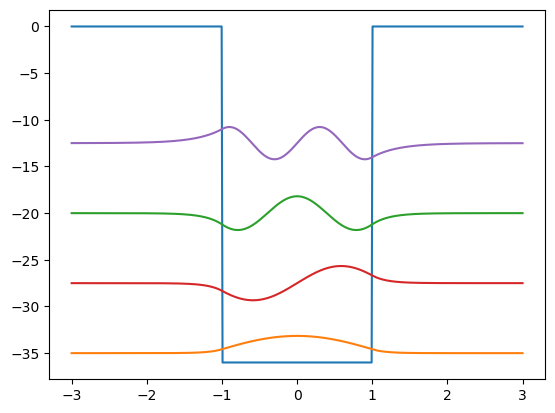

In [17]:
xi = 6
Es_even = energies_even(xi)
Es_odd = energies_odd(xi)

plt.plot(ys,well(xs,6,2))

for i,E in enumerate(Es_even):
  B,C = coefs_even(E,xi,l)
  plt.plot(ys,2*psi_even(ys,E,xi,l,B,C)-35+15*i)

for i,E in enumerate(Es_odd):
  B,C = coefs_odd(E,xi,l)
  plt.plot(ys,2*psi_odd(ys,E,xi,l,B,C)-27.5+15*i)

plt.savefig('well.png')

#### Continuum states: wave packets

* $E>0$

  For the continuum states, the wavefunction will take the form of a plane wave solution, with an induced phase shift due to the potential well, thus:

$$\begin{align*}
\phi&=\begin{cases}Ae^{ipx}+Be^{-ipx}\quad\text{if }x<-\frac{\ell}{2}\\
Ce^{iqx}+De^{-iqx}\quad\text{if }-\frac{\ell}{2} <x<\frac{\ell}{2}\\
Fe^{ipx}\quad\text{if }x>\frac{\ell}{2}\end{cases}\\
&=\Theta\left(-x-\frac{\ell}{2}\right)\phi_I(x)+\Theta\left(x+\frac{\ell}{2}\right)\Theta\left(-x+\frac{\ell}{2}\right)\phi_{II}(x)+\Theta\left(x-\frac{\ell}{2}\right)\phi_{III}(x)
\end{align*}$$

  assuming the wave incident from the left, with $p=\sqrt{2mE/\hbar^2}$ and $q=\sqrt{2m(E+V_0)/\hbar^2}$. Alongside with its derivatives, this solution must satisfy the continuity condition, on both boundaries, given by the equations:

  $$
  \mathbb{M}(p,-\ell/2)\begin{bmatrix}A\\B\end{bmatrix}=\mathbb{M}(q,-\ell/2)\begin{bmatrix}C\\D\end{bmatrix}
  $$

  $$
  \mathbb{M}(q,\ell/2)\begin{bmatrix}C\\D\end{bmatrix}=\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix}
  $$

  where

  $$\mathbb{M}(k,x)=\begin{bmatrix}e^{ikx}&e^{-ikx}\\ike^{ikx}&-ike^{-ikx}\end{bmatrix}.$$

The coefficients $A,B,C,D$ can be expressed in terms of $F$ by solving for the respective vectors:

$$
\begin{bmatrix}C\\D\end{bmatrix}=\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix} \\
$$

$$
\begin{bmatrix}A\\B\end{bmatrix}=\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(q,-\ell/2)\mathbb{M}^{-1}(q,\ell/2)\mathbb{M}(p,\ell/2)\begin{bmatrix}F\\0\end{bmatrix}.
$$

The constant $F$ is arbitrary and it should be given by the normalization of the wavefunction; however, continuum eigenfunctions are not normalizable, and hence, cannot represent a physical state of the system, for its squared modulus cannot be interpreted as a probability density [ref. Cohen-Tannoudji]. This issue can be solved by considering the physical states of the continuum as wave packets of the form:

$$
\psi(x)=\dfrac{1}{\sqrt{2\pi}N}\int_{-\infty}^\infty g(k)\phi(x;k)\mathrm{d}k.
$$

This is possible because the continuum eigenfunctions $\phi(x;k)$ form a complete continuous basis for the state space, so the previous integral can be interpreted as an expansion in said basis with coefficients $g(k)$. Here, $N$ is a normalization factor, given by:

$$
N^2=\dfrac{1}{2\pi}\int_{-\infty}^\infty\left|\int_{-\infty}^\infty g(k)\phi(x;k)\mathrm{d}k\right|^2\mathrm{d}x.
$$

For this exercise, we have chosen $g(k)$ to be a gaussian of the form:

$$
g(k)=e^{-\frac{\Delta p^2}{4}(p-p_0)^2}
$$

In [18]:
def matrix_M(k,x):
  return np.array([[np.exp(1j*k*x),np.exp(-1j*k*x)],[1j*k*np.exp(1j*k*x),-1j*k*np.exp(-1j*k*x)]])

In [19]:
def base_wf(x,p,xi,l):
  P0 = 2*xi/l
  q = (p**2+P0**2)**0.5
  F = 1
  G = 0
  coefsIII = np.array([F,G])
  M1 = matrix_M(p,l/2)
  M2 = np.linalg.inv(matrix_M(q,l/2))
  M3 = matrix_M(q,-l/2)
  M4 = np.linalg.inv(matrix_M(p,-l/2))
  A, B = M4 @ M3 @ M2 @ M1 @ coefsIII
  C, D = M2 @ M1 @ coefsIII

  phi1 = A*np.exp(1j*p*x)+B*np.exp(-1j*p*x)
  phi2 = C*np.exp(1j*q*x)+D*np.exp(-1j*q*x)
  phi3 = F*np.exp(1j*p*x)

  theta1 = np.heaviside(-x-l/2,1)
  rect2 = np.heaviside(x+l/2,1)*np.heaviside(-x+l/2,1)
  theta3 = np.heaviside(x-l/2,1)

  return theta1*phi1 + rect2*phi2 + theta3*phi3


In [20]:
def g_coefs(p,p0=0,delta_p=1):
  return np.exp(-delta_p**2/4*(p-p0)**2)

In [21]:
ps = np.linspace(-20,20,1001)

In [22]:
quad(g_coefs,-np.inf,np.inf,args=(5,2))

(1.772453850905516, 4.24906263809807e-09)

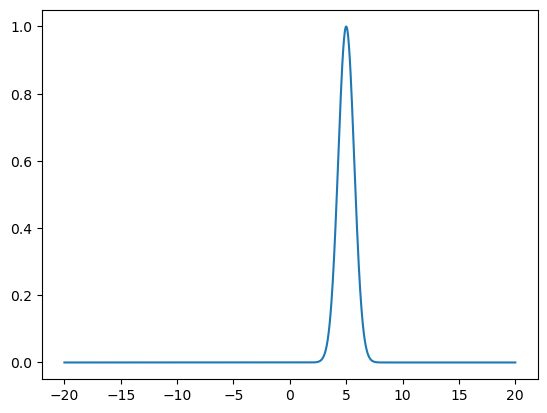

In [23]:
plt.plot(ps,g_coefs(ps,p0=5,delta_p=2))

In [24]:
def wave_packet(x,g,xi,l,**kwargs):
  func = lambda p,x_: g(p,**kwargs)*base_wf(x_,p,xi,l)
  real_func = lambda p,x_: func(p,x_).real
  imag_func = lambda p,x_: func(p,x_).imag
  psi = (2*np.pi)**0.5*(quad(real_func,0,np.inf,args=x,limit=1000)[0]+1j*quad(imag_func,0,np.inf,args=x,limit=1000)[0])
  return psi

wave_packet = np.vectorize(wave_packet)

In [25]:
(1+1j).conjugate()

(1-1j)

In [26]:
abs(wave_packet(0,g_coefs,xi,l,p0=5,delta_p=2))

3.1148161464560578

In [27]:
xs = np.linspace(-10,10,500)
ys = wave_packet(xs,g_coefs,xi,l,p0=5,delta_p=2)

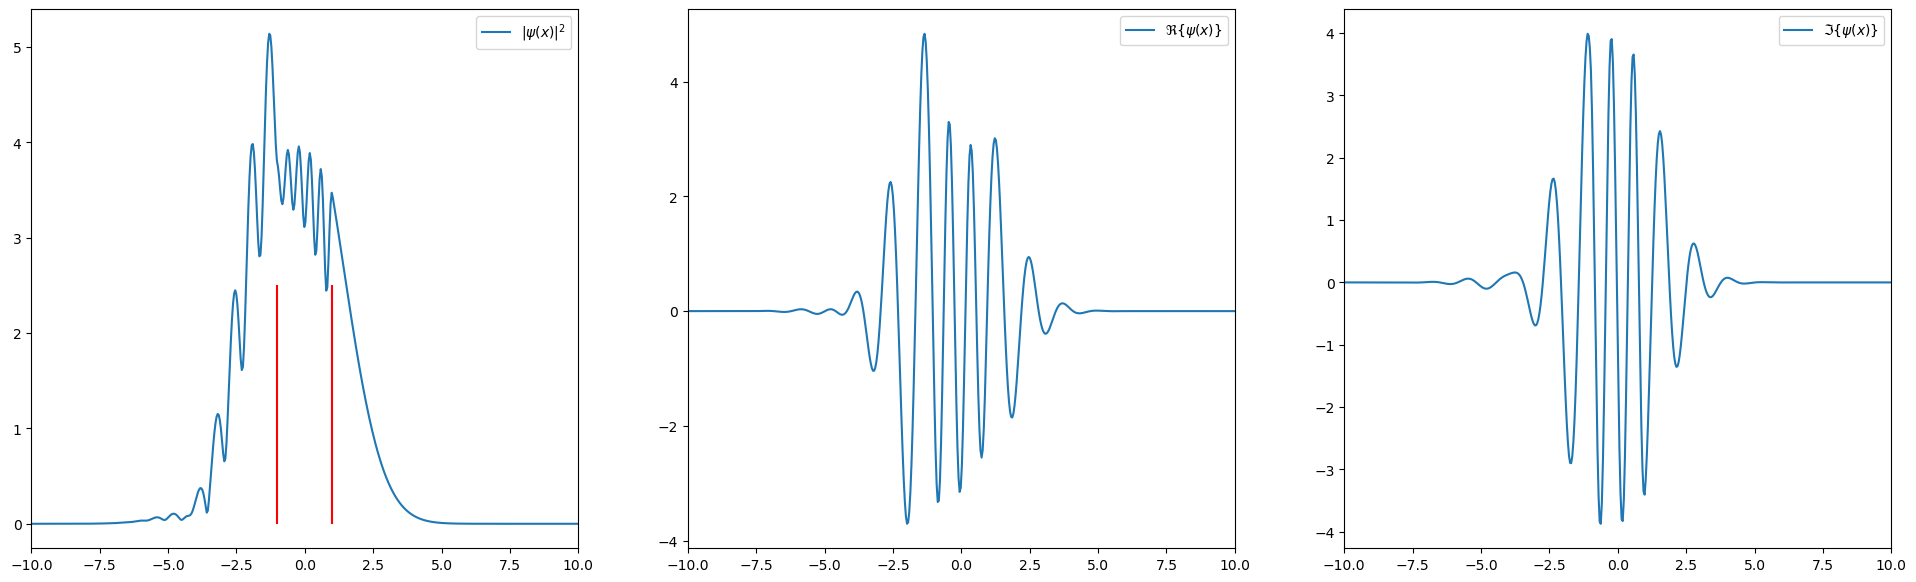

In [28]:
fig, ax = plt.subplots(1,3,figsize=(24,7))
ax[0].vlines(-1,0,2.5,'r')
ax[0].vlines(1,0,2.5,'r')
ax[0].set_xlim(-10,10)
ax[0].plot(xs,np.abs(ys),label=r'$|\psi(x)|^2$')
ax[0].legend()
ax[1].set_xlim(-10,10)
ax[1].plot(xs,ys.real,label=r'$\Re\{\psi(x)\}$')
ax[1].legend()
ax[2].plot(xs,ys.imag,label=r'$\Im\{\psi(x)\}$')
ax[2].set_xlim(-10,10)
ax[2].legend()

In [29]:
pdf = lambda x:abs(wave_packet(x,g_coefs,xi,l,p0=5,delta_p=2))

In [30]:
#N = quad(pdf,-10,10,limit=1000)
#N = N[0]**0.5

In [31]:
#ys = ys/N

In [32]:
# fig, ax = plt.subplots(1,3,figsize=(24,7))
# ax[0].vlines(-1,0,1.25,'r')
# ax[0].vlines(1,0,1.25,'r')
# ax[0].set_xlim(-10,10)
# ax[0].plot(xs,np.abs(ys),label=r'$|\psi(x)|^2$')
# ax[0].legend()
# ax[1].set_xlim(-10,10)
# ax[1].plot(xs,ys.real,label=r'$\Re\{\psi(x)\}$')
# ax[1].legend()
# ax[2].plot(xs,ys.imag,label=r'$\Im\{\psi(x)\}$')
# ax[2].set_xlim(-10,10)
# ax[2].legend()

$$E=\dfrac{\hbar^2p^2}{2m}$$

$$\begin{align}
\dfrac{2m}{\hbar^2}⟨E⟩&=\dfrac{2m}{\hbar^2}⟨\psi|\hat{H}|\psi⟩\\
&=\dfrac{2m}{\hbar^2}\int_{-\infty}^\infty\psi^*(x)\hat{H}\psi(x)\mathrm{d}x\\
&=\int_{-\infty}^\infty \psi^*(x)\left(-\dfrac{\mathrm{d}^2}{\mathrm{d}x^2}+\dfrac{2m}{\hbar^2}V(x)\right)\psi(x)~\mathrm{d}x
\end{align}$$

### **Continuum states: big well**

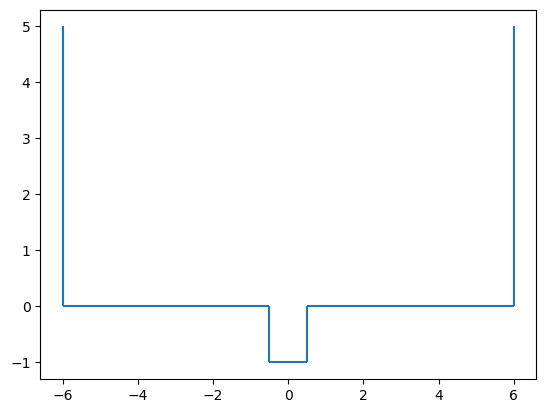

In [33]:
plt.vlines([-6,6],0,5)
plt.vlines([-0.5,0.5],0,-1)
plt.hlines(0,-6,-0.5)
plt.hlines(0,6,0.5)
plt.hlines(-1,-0.5,0.5)

$$
V(x) = \begin{cases} -V_0,\text{  if  } |x|\leq \frac{\ell}{2}\\
0,\text{  if  } \frac{\ell}{2}\leq|x|\leq N\frac{\ell}{2}\\
\infty,\text{  otherwise}\end{cases}
$$

$$
-\dfrac{\hbar^2}{2m}\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}+V(x)\psi=E\psi
$$

$$
\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=\dfrac{2m(V(x)-E)}{\hbar^2}\psi=\left(\dfrac{4\xi(x)^2}{\ell^2}-p^2\right)\psi
$$

Eigenstates must have definite parity. Eigenfunctions and their derivatives must be continuous in $x=\pm\ell/2$. $\psi(-N\ell/2)=\psi(N\ell/2)=0$.

**Region I:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-p^2\psi$$

$$\implies\psi_I(x)=A\cos px+B\sin px$$

**Region III:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-p^2\psi$$

$$\implies\psi_{III}(x)=A'\cos px+B'\sin px$$

**Region II:** $$\dfrac{\mathrm{d}^2\psi}{\mathrm{d}x^2}=-\left(\dfrac{4\xi^2}{\ell^2}+p^2\right)\psi=-q^2\psi$$

$$\implies\psi_{II}(x)=C\cos qx+D\sin qx$$

_**Even states:**_ $\psi(-x)=\psi(x)\implies D=0, A'=A,B'=-B$

B.C. $\implies A = B\tan\left(\dfrac{N\ell}{2}p\right)$

$$
\psi(x)=\begin{cases}B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }-\frac{N\ell}{2}\leq x\leq-\frac{\ell}{2}\\
C\cos qx,\text{  if  }-\frac{\ell}{2}\leq x\leq\frac{\ell}{2}\\
B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px-\sin px\right],\text{  if  }\frac{\ell}{2}\leq x\leq\frac{N\ell}{2}
\end{cases}
$$


Continuity: $\implies z\cot\left(\sqrt{\xi^2+z^2}\right)\dfrac{\tan Nz\sin z+\cos z}{\tan Nz\cos z-\sin z}=\sqrt{\xi^2+z^2}$

where $z=\dfrac{\ell p}{2}$

The asymptotes of the left-hand side are located at $z=\frac{k\pi}{N-1},~k\in\mathbb{Z}$ and $z=\sqrt{k^2\pi^2-\xi^2},~k\in\mathbb{Z}$.

_**Odd states:**_ $\psi(-x)=-\psi(x)\implies C=0, A'=-A,B'=B$

B.C. $\implies A = B\tan\left(\dfrac{N\ell}{2}p\right)$

$$
\psi(x)=\begin{cases}B\left[\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }-\frac{N\ell}{2}\leq x\leq-\frac{\ell}{2}\\
D\sin qx,\text{  if  }-\frac{\ell}{2}\leq x\leq\frac{\ell}{2}\\
B\left[-\tan\left(\dfrac{N\ell}{2}p\right)\cos px+\sin px\right],\text{  if  }\frac{\ell}{2}\leq x\leq\frac{N\ell}{2}
\end{cases}
$$


Continuity: $\implies -z\tan\left(\sqrt{\xi^2+z^2}\right)\dfrac{\tan Nz\sin z+\cos z}{\tan Nz\cos z-\sin z}=\sqrt{\xi^2+z^2}$

where $z=\dfrac{\ell p}{2}$

The asymptotes of the left-hand side are located at $z=\frac{k\pi}{N-1},~k\in\mathbb{Z}$ and $z=\sqrt{\left(k+\frac{1}{2}\right)^2\pi^2-\xi^2},~k\in\mathbb{Z}$.

In [115]:
def lhs_cont_even(z,xi,N):
  num = np.tan(N*z)*np.sin(z)+np.cos(z)
  den = np.tan(N*z)*np.cos(z)-np.sin(z)

  return (z/np.tan((xi**2+z**2)**0.5))*(num/den)

def lhs_cont_odd(z,xi,N):
  num = np.tan(N*z)*np.sin(z)+np.cos(z)
  den = np.tan(N*z)*np.cos(z)-np.sin(z)

  return -(z*np.tan((xi**2+z**2)**0.5))*(num/den)

def rhs_cont(z,xi):
  return (xi**2+z**2)**0.5

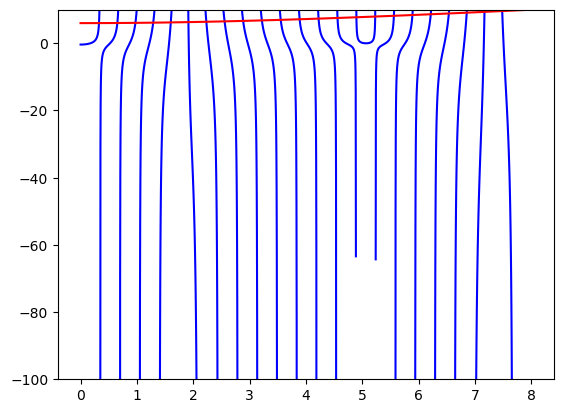

In [35]:
sup_lim = 8
N = 10
dz = 1e-3

asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
asym_cot = [(k**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if ((k**2*np.pi**2-xi**2)**0.5).imag==0]

asym = asym_den+asym_cot

asym.sort()

for i in range(len(asym)-1):
  zs = np.linspace(asym[i]+dz,asym[i+1]-dz,100)
  ys = lhs_cont_even(zs,6,N)
  plt.plot(zs,ys,color='b')
plt.ylim(-100,10)

zs = np.linspace(0,sup_lim)
plt.plot(zs,rhs_cont(zs,xi),'r')

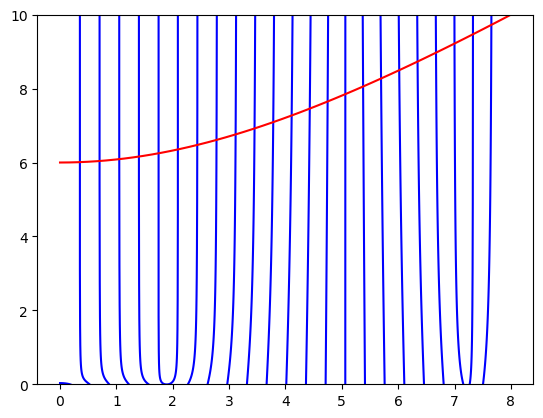

In [116]:
sup_lim = 8
N = 10
dz = 1e-5

asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
asym_cot = [((k+1/2)**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi-1/2)+1) if (((k+1/2)**2*np.pi**2-xi**2)**0.5).imag==0]

asym = asym_den+asym_cot

asym.sort()

for i in range(len(asym)-1):
  zs = np.linspace(asym[i]+dz,asym[i+1]-dz,100)
  ys = lhs_cont_odd(zs,6,N)
  plt.plot(zs,ys,color='b')
plt.ylim(0,10)

zs = np.linspace(0,sup_lim)
plt.plot(zs,rhs_cont(zs,xi),'r')

```
def energies_even(xi):
  func = lambda z: np.tan(z)-(xi**2-z**2)**0.5/z
  n = int(np.ceil(xi/np.pi))
  Es = np.zeros(n)
  for i in range(n):
    Es[i] = newton(func,np.pi/4+i*np.pi)
  return Es
```

In [117]:
def energies_even_cont(xi,N,sup_lim):
  func = lambda z: lhs_cont_even(z,xi,N)-rhs_cont(z,xi)
  asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
  asym_cot = [(k**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if ((k**2*np.pi**2-xi**2)**0.5).imag==0]

  asym = asym_den+asym_cot

  asym.sort()

  dz = 1e-5
  Es = []
  for i in range(len(asym)-1):
    if (func(asym[i]+dz)*func(asym[i+1]-dz)>0):
      aux = np.linspace(asym[i]+dz,asym[i+1]-dz,100)
      if all(val>0 for val in func(aux)) or all(val<0 for val in func(aux)):
        continue
      else:
        b = (asym[i]+asym[i+1])/2
        E1 = ridder(func,asym[i]+dz,b,maxiter=1000)
        E2 = ridder(func,b,asym[i+1]-dz)
        Es.append(E1)
        Es.append(E2)
    else:
      E = ridder(func,asym[i]+dz,asym[i+1]-dz,maxiter=1000)
      Es.append(E)

  return Es

In [119]:
def energies_odd_cont(xi,N,sup_lim):
  func = lambda z: lhs_cont_odd(z,xi,N)-rhs_cont(z,xi)
  asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
  asym_cot = [((k+1/2)**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if (((k+1/2)**2*np.pi**2-xi**2)**0.5).imag==0]

  asym = asym_den+asym_cot

  asym.sort()

  dz = 1e-5
  Es = []
  for i in range(len(asym)-1):
    if (func(asym[i]+dz)*func(asym[i+1]-dz)>0):
      aux = np.linspace(asym[i]+dz,asym[i+1]-dz,100)
      if all(val>0 for val in func(aux)) or all(val<0 for val in func(aux)):
        continue
      else:
        b = (asym[i]+asym[i+1])/2
        E1 = ridder(func,asym[i]+dz,b,maxiter=1000)
        E2 = ridder(func,b,asym[i+1]-dz)
        Es.append(E1)
        Es.append(E2)
    else:
      E = ridder(func,asym[i]+dz,asym[i+1]-dz,maxiter=1000)
      Es.append(E)

  return Es

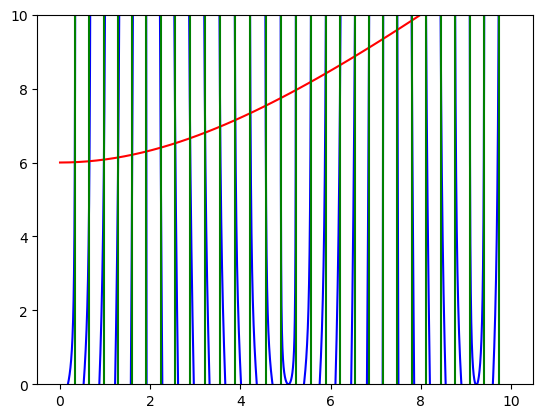

In [120]:
sup_lim = 10
N = 10
dz = 1e-3

asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
asym_cot = [(k**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if ((k**2*np.pi**2-xi**2)**0.5).imag==0]

asym = asym_den+asym_cot

asym.sort()

for i in range(len(asym)-1):
  zs = np.linspace(asym[i]+dz,asym[i+1]-dz,1000)
  ys = lhs_cont_even(zs,xi,N)
  plt.plot(zs,ys,color='b')
plt.ylim(0,10)

Es_even = energies_even_cont(xi,N,sup_lim)

zs = np.linspace(0,sup_lim)
plt.plot(zs,rhs_cont(zs,xi),'r')
plt.vlines(Es_even,0,10,'g')
#plt.xlim(0,2)

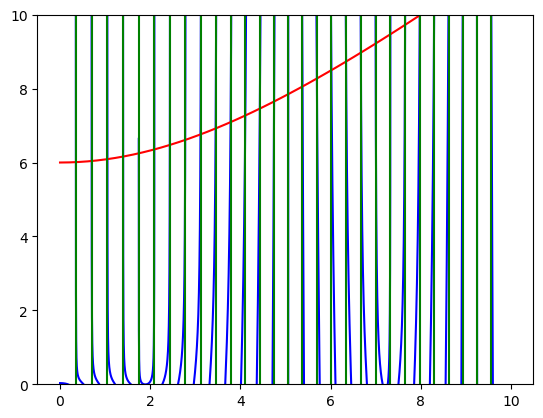

In [121]:
sup_lim = 10
N = 10
dz = 1e-3

asym_den = [k*np.pi/(N-1) for k in range(int(sup_lim*(N-1)/np.pi)+1)]
asym_cot = [((k+1/2)**2*np.pi**2-xi**2)**0.5 for k in range(int((sup_lim**2+xi**2)**0.5/np.pi)+1) if (((k+1/2)**2*np.pi**2-xi**2)**0.5).imag==0]

asym = asym_den+asym_cot

asym.sort()

for i in range(len(asym)-1):
  zs = np.linspace(asym[i]+dz,asym[i+1]-dz,1000)
  ys = lhs_cont_odd(zs,xi,N)
  plt.plot(zs,ys,color='b')
plt.ylim(0,10)

Es_odd = energies_odd_cont(xi,N,sup_lim)

zs = np.linspace(0,sup_lim)
plt.plot(zs,rhs_cont(zs,xi),'r')
plt.vlines(Es_odd,0,10,'g')
#plt.xlim(0,2)

In [122]:
energies = Es_even + Es_odd
energies.sort()

In [123]:
np.array(energies[1:])-np.array(energies[:-1])

array([0.0230961 , 0.30232532, 0.04811277, 0.27281411, 0.07678589,
       0.23870763, 0.10973383, 0.2021836 , 0.14484684, 0.16805115,
       0.17735178, 0.14053677, 0.20301134, 0.12092613, 0.22047514,
       0.10846983, 0.23036981, 0.10203572, 0.23364825, 0.10089096,
       0.23083876, 0.10483485, 0.22203939, 0.11401328, 0.20742734,
       0.12838874, 0.18821823, 0.14679797, 0.16739666, 0.1662385 ,
       0.14892738, 0.18267395, 0.13583627, 0.19298559, 0.12935203,
       0.19591655, 0.12947712, 0.19168762, 0.13559104, 0.18164006,
       0.14637077, 0.16828741, 0.15941095, 0.15497708, 0.17144846,
       0.14478156, 0.17948668, 0.13953658, 0.18185956, 0.13974204,
       0.17849282, 0.14483855, 0.17072136, 0.15329903, 0.16095643,
       0.16272406, 0.15198965, 0.17041438])

In [124]:
def coefs_even_cont(z:float,xi:float,l:float,N:int):
  psi1 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x))**2
  psi2 = lambda x: np.cos(2/l*(xi**2+z**2)**0.5*x)**2
  psi3 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x)-np.sin(2/l*z*x))**2

  factor = (np.tan(N*z)*np.cos(z)-np.sin(z))/np.cos((xi**2+z**2)**0.5)

  B2 = (quad(psi1,-N*l/2,-l/2)[0]+quad(psi3,l/2,N*l/2)[0]+factor**2*quad(psi2,-l/2,l/2)[0])**(-1)
  B = B2**0.5
  C = B*factor
  return B,C

def psi_even_cont(y:np.ndarray,z:float,xi:float,l:float,B:float,C:float,N:int):
  psi1 = lambda x: np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x)
  psi2 = lambda x: np.cos(2/l*(xi**2+z**2)**0.5*x)
  psi3 = lambda x: np.tan(N*z)*np.cos(2/l*z*x)-np.sin(2/l*z*x)
  #B, C = coefs

  if (-N*l/2 <= y) and (y < -l/2):
    return B*psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C*psi2(y)
  elif (l/2 < y) and (y <= N*l/2):
    return B*psi3(y)
  else:
    return y*0

psi_even_cont = np.vectorize(psi_even_cont)

In [137]:
B,C = coefs_even_cont(Es_even[-1],xi,l,N)
int_dummy = 5
xs = np.linspace(-N*l/2-int_dummy,N*l/2+int_dummy,1000)
ys = psi_even_cont(xs,Es_even[-1],xi,l,B,C,N)


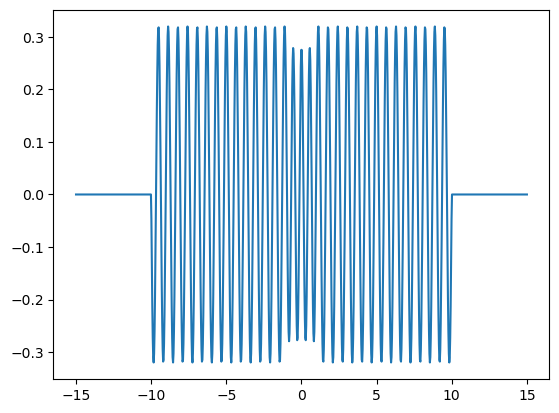

In [138]:
plt.plot(xs,ys)

In [127]:
norm = lambda y,z,xi,l,B,C,N: psi_even_cont(y,z,xi,l,B,C,N)**2

In [128]:
quad(norm,-N*l/2,N*l/2,args=(Es_even[1],xi,l,B,C,N))

(1.0430042815730043, 2.7482138786893984e-09)

In [129]:
def coefs_odd_cont(z:float,xi:float,l:float,N:int):
  psi1 = lambda x: (np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x))**2
  psi2 = lambda x: np.sin(2/l*(xi**2+z**2)**0.5*x)**2
  psi3 = lambda x: (-np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x))**2

  factor = (-np.tan(N*z)*np.cos(z)+np.sin(z))/np.sin((xi**2+z**2)**0.5)

  B2 = (quad(psi1,-N*l/2,-l/2)[0]+quad(psi3,l/2,N*l/2)[0]+factor**2*quad(psi2,-l/2,l/2)[0])**(-1)
  B = B2**0.5
  C = B*factor
  return B,C

def psi_odd_cont(y:np.ndarray,z:float,xi:float,l:float,B:float,C:float,N:int):
  psi1 = lambda x: np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x)
  psi2 = lambda x: np.sin(2/l*(xi**2+z**2)**0.5*x)
  psi3 = lambda x: -np.tan(N*z)*np.cos(2/l*z*x)+np.sin(2/l*z*x)
  #B, C = coefs

  if (-N*l/2 <= y) and (y < -l/2):
    return B*psi1(y)
  elif (-l/2 <= y) and (y <= l/2):
    return C*psi2(y)
  elif (l/2 < y) and (y <= N*l/2):
    return B*psi3(y)
  else:
    return y*0

psi_odd_cont = np.vectorize(psi_odd_cont)

In [139]:
B,C = coefs_odd_cont(Es_odd[-1],xi,l,N)
int_dummy = 5
xs = np.linspace(-N*l/2-int_dummy,N*l/2+int_dummy,1000)
ys = psi_odd_cont(xs,Es_odd[-1],xi,l,B,C,N)


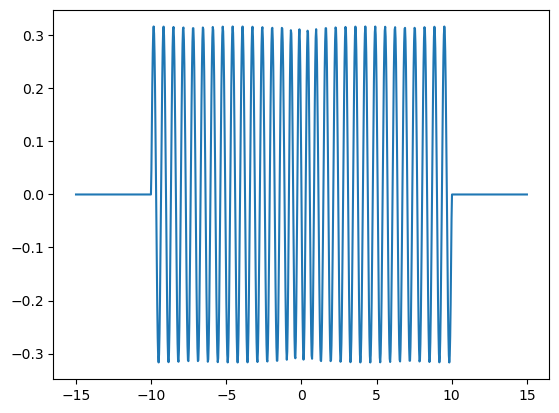

In [140]:
plt.plot(xs,ys)

### **Thermal probability**

$$\mathbb{P}_n(x,t)=\dfrac{\displaystyle\sum_{\text{discrete}}\psi_n^2(x)e^{-\frac{E_n}{kT}}+\displaystyle\sum_{\text{continuous}}\psi_n^2(x)e^{-\frac{E_n}{kT}}}{\displaystyle\sum_{\text{discrete}}e^{-\frac{E_n}{kT}}+\displaystyle\sum_{\text{continuous}}e^{-\frac{E_n}{kT}}}$$

Continuum states: $$\dfrac{\Delta E}{kT}\ll 1$$